In [1]:
using Plots
using LaTeXStrings

# Fluidinámica computacional (Sesión 05)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

# g)

**Utilice una estrategia para la linealización del termino fuente, considerando inicialmente la expresión que es función de la temperatura dada en grados Celcius, y posteriormente el caso para que la temperatura esta dada en Kelvin.**

## Tratamiento del término para temperatura en Celcius

La ecuación para el termino fuente esta dada por:

$$
S= 4 \times 10^7 - 150 T_C^2
$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

**$S$:** Termino fuente, en $[\mathrm{W.m^{-3}}]$.

**$T_C$:** Temperatura, en $[\mathrm{^\circ C}]$.

</div>

</details>

La linealización se realiza considerando una aproximación mediante Series de Taylor truncadas, para la temperatura en la Celda $P$:

$$
S = S^* + \left( \frac{dS}{dT} \right)^* \left( T_P - T_P^* \right)
$$

Para el termino fuente del caso de estudio, se tiene:

$$S^* = 4 \times 10^7 - 150 {T_P^*}^2$$

$$\left(\frac{dS}{dT}\right)^* = -300 {T_P^*}$$

Sustituyendo en la serie de Taylor:

$$
S = \underbrace{4 \times 10^7 - 150 {T_P^*}^2}_{S^*} \underbrace{- 300 {T_P^*}}_{\left(\frac{dS}{dT}\right)^*} \left( T_P - T_P^* \right)
$$

Finalmente, al agrupar términos se obtiene la ecuación:

$$
S = \underbrace{4 \times 10^7 + 150 {T_P^*}^2}_{S_C} \underbrace{-  (300 {T_P^*})}_{S_P} T_P
$$

$$S_C = 4 \times 10^7 + 150 {T_P^*}^2$$

$$S_P = -  300 {T_P^*}$$

## Tratamiento del término para temperatura en Kelvin

La ecuación para el termino fuente esta dada por:

$$
S= 4 \times 10^7 - 150 (T_K - 273.15)^2
$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

**$S$:** Termino fuente, en $[\mathrm{W.m^{-3}}]$.

**$T_K$:** Temperatura, en $[K]$.

</div>

</details>

La linealización se realiza considerando una aproximación mediante Series de Taylor truncadas, para la temperatura en la Celda $P$:

$$
S = S^* + \left( \frac{dS}{dT} \right)^* \left( T_P - T_P^* \right)
$$

Para el termino fuente del caso de estudio, se tiene:

$$
S^* = 
\underbrace{- 150 {T_P^*}^2}_{\mathrm{cuadrático}} 
\underbrace{+ 300(273.15){T_P^*}}_{\mathrm{lineal}} 
\underbrace{+ 4 \times 10^7 - 150(273.15)^2}_{\mathrm{constante}}
$$

$$\left(\frac{dS}{dT}\right)^* = -300 {T_P^*} + 300(273.15)$$

Sustituyendo en la serie de Taylor:

$$
S = \underbrace{- 150 {T_P^*}^2 + 300(273.15){T_P^*} + 4 \times 10^7 - 150(273.15)^2}_{S^*}
\underbrace{+ \left(  -300 {T_P^*} + 300(273.15) \right)}_{\left(\frac{dS}{dT}\right)^*} \left( T_P - T_P^* \right)
$$

Finalmente, al agrupar términos se obtiene la ecuación:

$$
S = 
\underbrace{4 \times 10^7 + 150 \left( {T_P^*}^2 - (273.15)^2\right)}_{S_C}  
\underbrace{- 300 ({T_P^*} - 273.15)}_{S_P} T_P
$$

$$S_C = 4 \times 10^7 + 150 \left( {T_P^*}^2 - (273.15)^2\right)$$

$$S_P = -300 ({T_P^*} - 273.15)$$

## Comportamiento del término fuente

### Gráficos del término fuente linealizado

In [ ]:
# Definición de funciones para graficar
""" Término fuente, S"""
S(T) = @. 4e7 - 150 * (T - 273.15)^2

""" Parte constante del término fuente linealizado, Sc"""
Sc(T) = @. 4e7 + 150 * (T^2 - 273.15^2)

""" Pendiente del término fuente linealizado, Sp"""
Sp(T) = @. -300 * (T - 273.15)

Sp

In [3]:
# definir rango de temperaturas para graficar
T = collect(0: 10: 1000);

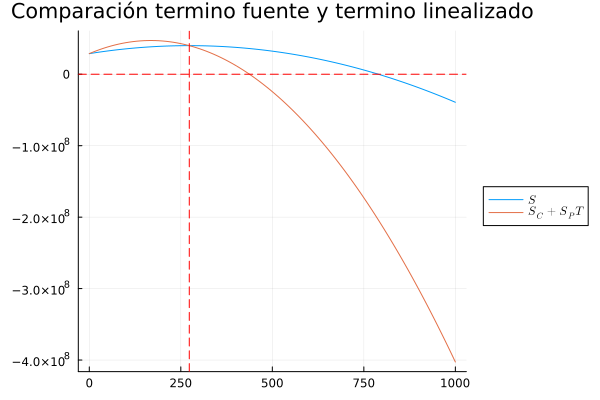

In [4]:
# Gráfico comparando término fuente y término linealizado (deben ser iguales)
plot(T, S(T), label=L"S", leg=:outerright)
plot!(T, (@.Sc(T)+Sp(T)*T), label=L"S_C + S_P T")
vline!([273.15], linestyle = :dash, color = :red, label=false)
hline!([0], linestyle = :dash, color = :red, label=false)
title!("Comparación termino fuente y termino linealizado")


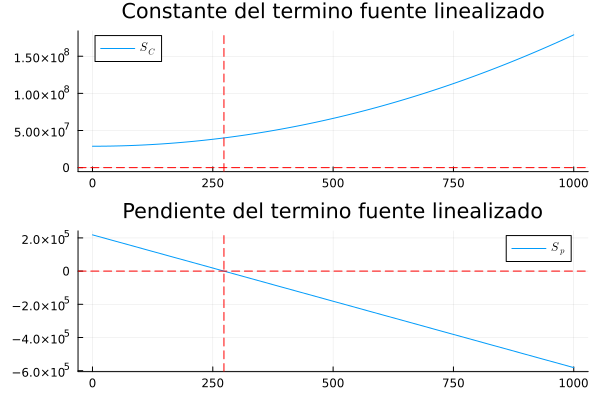

In [5]:
# Grafico: constante del termino fuente linealizado
l1 = plot(T, Sc(T), label=L"S_C")
vline!([273.15], linestyle = :dash, color = :red, label=false)
hline!([0], linestyle = :dash, color = :red, label=false)
title!("Constante del termino fuente linealizado")

# Grafico: pendiente del termino fuente linealizado
l2 = plot(T, Sp(T), label=L"$S_p$")
vline!([273.15], linestyle = :dash, color = :red, label=false)
hline!([0], linestyle = :dash, color = :red, label=false)
title!("Pendiente del termino fuente linealizado")
	
plot(l1, l2, layout=(2, 1))

### Comentarios

Nótese que el cambio de signo en el valor de $S_P$ a $273.15 \, [\mathrm{K}]$

Este valor marca un punto crítico a partir del cual la estabilidad del método numérico podría verse comprometida.

Considerando la regla de los coeficientes positivos, y recordando que:

$$a_P = a_P^0 + a_W + a_E - S_P V$$

dependiendo de los valores de $a_P^0$, $a_W$, $a_E$, y $V$:

- Se puede provocar un comportamiento numérico inestable al tener
al tener $S_P > 0$. 

- Esto ocurre si la combinación de coeficientes es tal que $a_P < 0$.